### Notebook developed by Zeljko Ivezic following nomenclature in writeup transient.pdf

In [1]:
import os 
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from astropy.table import Table
from astroML.filters import savitzky_golay, wiener_filter
%matplotlib inline

In [344]:
## automatically reload any modules read below that might have changed (e.g. plots)
%load_ext autoreload
%autoreload 2
# importing ZI tools for thermal analysis: 
import sputnikTools as s 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [335]:
def plotAreas(area, eta, fac):
    
    fig = plt.figure(figsize=(9, 4))
    fig.subplots_adjust(bottom=0.09, left=0.11, right=0.96, top = 0.98, wspace=0.30, hspace=0.3)

    ax = fig.add_subplot(1,2,1)
    ax.set_xlabel(r'$\alpha$ (orbit angle)', fontsize=15)
    ax.set_ylabel(r'$area$', fontsize=15)
    ax.set_ylim(-0.05,2.05)
    ax.plot(alpha, area['Xp'], '-g') 
    ax.plot(alpha, area['Yp'], '--r') 
    ax.plot(alpha, area['Zp'], '-.b') 
    ax.plot(alpha, eta, '--k') 
    ax.plot(alpha, fac, '--y') 
    ax.set_xlabel(r'$\alpha$ (orbit angle)')
    ax.set_ylabel(r'$area$')
    ax.set_ylim(-0.05,2.05)

    ax = fig.add_subplot(1,2,2)
    ax.set_xlabel(r'$\alpha$ (orbit angle)', fontsize=15)
    ax.set_ylabel(r'$area$', fontsize=15)
    ax.set_ylim(-0.05,2.05)
    ax.plot(alpha, area['Xm'], '-g') 
    ax.plot(alpha, area['Ym'], '--r') 
    ax.plot(alpha, area['Zm'], '-.b') 
    ax.plot(alpha, eta, '--k') 
    ax.plot(alpha, fac, '--y') 
    ax.set_xlabel(r'$\alpha$ (orbit angle)')
    ax.set_ylabel(r'$area$')
    ax.set_ylim(-0.05,2.05)

    plt.show()    

In [333]:
# beta=90 orbit
fEcl, fAlb, areaS, areaE, etaS, etaE = s.getAreasForOrbitImagingMode(50, beta0=False)
print(np.mean(etaS), np.mean(etaE))

assuming beta=90 sun-synchronous orbit
0.2818088518920079 0.34324781980706826


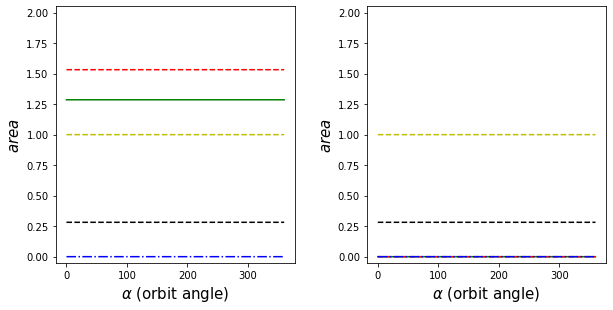

In [336]:
plotAreas(areaS, etaS, fEcl)

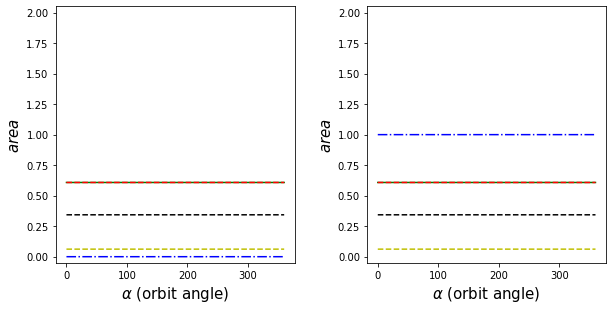

In [337]:
plotAreas(areaE, etaE, fAlb)

In [338]:
# beta=0 orbit
fEcl, fAlb, areaS, areaE, etaS, etaE = s.getAreasForOrbitImagingMode(50, beta0=True)
print(np.mean(etaS), np.mean(etaE))

assuming beta=0 sun-synchronous orbit
0.24300041267679326 0.34324781980706826


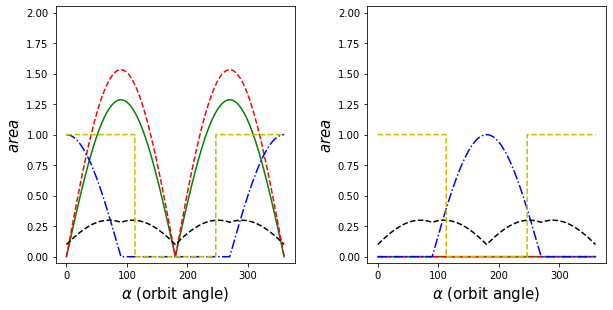

In [339]:
plotAreas(areaS, etaS, fEcl)

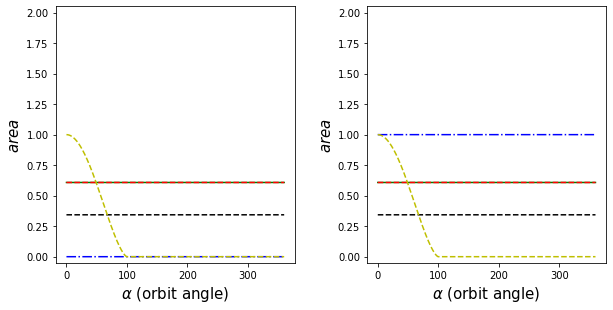

In [340]:
plotAreas(areaE, etaE, fAlb)

In [364]:
realAreaFac, realAlpha, realEps = s.getSOCiRealAreas(SolarCells=False)
realAreaFacCells, realAlphaCells, realEpsCells = s.getSOCiRealAreas(SolarCells=True)

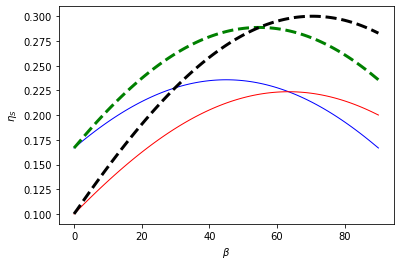

the etaS range for 1U: 0.1668081377696818 0.23577299594702342
NEW the etaS range for 1U: 0.1668081377696818 0.28867206117169747
the etaS range for 2U: 0.10016976532361817 0.22368523747343735
NEW the etaS range for 2U: 0.10016976532361817 0.29998985406336454


In [290]:
# determine the range of etaS for 1U and 2U CubeSats
h = 1000
beta = np.linspace(0,90,91)
etaS1 = 0*beta
etaS2 = 0*beta
for i in range(0,91):
    etaS1[i] = s.getEffectiveAreas1U(h, beta[i])
    etaS2[i] = s.getEffectiveAreas2U(h, beta[i])
# test new code, theta is beta 
phi = 45 + 0*beta
areaS1 = s.getEffectiveAreasCubeSat(h, phi, beta, 1)
areaS2 = s.getEffectiveAreasCubeSat(h, phi, beta, 2)
etaS1new = s.getEffectiveEtasCubeSat(areaS1, nU=1)
etaS2new = s.getEffectiveEtasCubeSat(areaS2, nU=2)
# plot
plt.figure()
plt.plot(beta, etaS1, lw=1, c='b') 
plt.plot(beta, etaS2, lw=1, c='r') 
plt.plot(beta, etaS1new, '--g', lw=3) 
plt.plot(beta, etaS2new, '--k', lw=3) 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\eta_S$')
plt.show()    
print('the etaS range for 1U:', np.min(etaS1), np.max(etaS1))
print('NEW the etaS range for 1U:', np.min(etaS1new), np.max(etaS1new))
print('the etaS range for 2U:', np.min(etaS2), np.max(etaS2))
print('NEW the etaS range for 2U:', np.min(etaS2new), np.max(etaS2new))



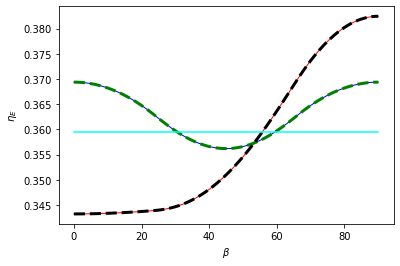

the etaE range for 1U: 0.35620029675022374 0.3693731831725569
NEW the etaE range for 1U: 0.3562002967502238 0.3693731831725569
the etaE range for 2U: 0.3432478198070683 0.38243586485530123
NEW the etaE range for 2U: 0.3432478198070683 0.38243586485530123


In [295]:
# determine the range of etaE for 1U and 2U CubeSats
h = 1.0865
beta = np.linspace(0,90,91)
etaE1 = 0*beta
etaE2 = 0*beta
for i in range(0,91):
    etaE1[i] = s.getEffectiveAreas1U(h, beta[i])
    etaE2[i] = s.getEffectiveAreas2U(h, beta[i])
# test new code, theta is beta  
phi = 0 + 0*beta
areaE1 = s.getEffectiveAreasCubeSat(h, phi, beta, 1)
areaE2 = s.getEffectiveAreasCubeSat(h, phi, beta, 2)
etaE1new = s.getEffectiveEtasCubeSat(areaE1, nU=1)
etaE2new = s.getEffectiveEtasCubeSat(areaE2, nU=2)
# sphere
RE = 6378
fE = 1/h**2
etaEsph = 0.50 * (1-np.sqrt(1-fE)) / fE  
plt.figure()
plt.plot(beta, etaE1, lw=1, c='b') 
plt.plot(beta, etaE2, lw=1, c='r') 
plt.plot(beta, etaE1new, '--g', lw=3) 
plt.plot(beta, etaE2new, '--k', lw=3) 
plt.plot([0,90], [etaEsph, etaEsph], c='cyan')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\eta_E$')
plt.show()    
print('the etaE range for 1U:', np.min(etaE1), np.max(etaE1))
print('NEW the etaE range for 1U:', np.min(etaE1new), np.max(etaE1new))
print('the etaE range for 2U:', np.min(etaE2), np.max(etaE2))
print('NEW the etaE range for 2U:', np.min(etaE2new), np.max(etaE2new))

In [6]:
defaultParams = s.getInputParamsDefault()
Qsun, Qref, QIR, Qdissip = s.getAllHeatQ(defaultParams)
Qsun, Qref, QIR, Qdissip

(29.498, 6.686357775939639, 6.288307886710842, 4.848703941975911)

In [7]:
QinSun, QinEclipse = s.getQin(defaultParams)
QinSun, QinEclipse

(40.08449804943846, 11.137011828686752)

In [10]:
TeqSun = s.getTeq(QinSun,defaultParams)
TeqEclipse = s.getTeq(QinEclipse,defaultParams)
TeqSun, TeqEclipse

(301.10501603652637, 218.6079986020609)

In [11]:
p2 = s.getInputParamsDefault()
p2['etaCell'] = 0.0
Qsun2, Qref2, QIR2, Qdissip2 = s.getAllHeatQ(p2)
Qsun2, Qref2, QIR2, Qdissip2

(29.498, 6.686357775939639, 6.288307886710842, 0.0)

In [12]:
QinSun2, QinEclipse2 = s.getQin(p2)
QinSun2, QinEclipse2

(42.47266566265048, 6.288307886710842)

In [14]:
TeqSun2 = s.getTeq(QinSun2,p2)
TeqEclipse2 = s.getTeq(QinEclipse2,p2)
TeqSun2, TeqEclipse2

(305.4929960327351, 189.4991766384045)

In [15]:
params = s.getInputParamsDefault()
params['mass'] = 2.2
params['Fsun'] = 1362
params['FIR'] = 239 
params['falb'] = 1.0
params['Atot'] = 0.113 
params['etaCell'] = 0.0

In [16]:
## test old results 
t1 = 'Al black anodized'
t2 = 'Al blue anodized'
t3 = 'Al yellow anodized' 
timeA, TempsBlack = s.doOneCase(t1, 0.86, 0.86, params) 
timeA, TempsBlue = s.doOneCase(t2, 0.67, 0.87, params) 
timeA, TempsYellow = s.doOneCase(t3, 0.47, 0.87, params)  

name = 'OldDefaultsTest'
title = "test of old defaults (m=2.2 kg)"
s.TempsPlot(timeA, TempsBlack, t1, TempsBlue, t2, TempsYellow, t3, name, title)


Al black anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 52.263574382501474  Qeclipse= 7.0761804623499875

Al blue anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 42.36259410319301  Qeclipse= 7.158461630516848

Al yellow anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 31.853897842692657  Qeclipse= 7.158461630516848


In [18]:
## mass variation with 3 anodized Al versions
params = s.getInputParamsDefault()

params['mass'] = 0.05
timeA, TempsBlack = s.doOneCase(t1, 0.86, 0.86, params) 
timeA, TempsBlue = s.doOneCase(t2, 0.67, 0.87, params) 
timeA, TempsYellow = s.doOneCase(t3, 0.47, 0.87, params) 
name = 'DefaultsMassVariationMsmall'
s.TempsPlot(timeA, TempsBlack, t1, TempsBlue, t2, TempsYellow, t3, name)

params['mass'] = 2.2
timeA, TempsBlack = s.doOneCase(t1, 0.86, 0.86, params) 
timeA, TempsBlue = s.doOneCase(t2, 0.67, 0.87, params) 
timeA, TempsYellow = s.doOneCase(t3, 0.47, 0.87, params)  
name = 'DefaultsMassVariationMdefault'
s.TempsPlot(timeA, TempsBlack, t1, TempsBlue, t2, TempsYellow, t3, name)

params['mass'] = 10
timeA, TempsBlack = s.doOneCase(t1, 0.86, 0.86, params) 
timeA, TempsBlue = s.doOneCase(t2, 0.67, 0.87, params) 
timeA, TempsYellow = s.doOneCase(t3, 0.47, 0.87, params)  
name = 'DefaultsMassVariationMlarge'
s.TempsPlot(timeA, TempsBlack, t1, TempsBlue, t2, TempsYellow, t3, name)


Al black anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752
adjusting Tmin= 218.6079986020609 to: Tcold= 218.6079986020609
adjusting Tmax= 301.35517436921134 to: Thot= 301.10501603652637

Al blue anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 32.69101775635574  Qeclipse= 10.138906398328249
adjusting Tmin= 212.91999929481437 to: Tcold= 212.91999929481437
adjusting Tmax= 285.4555982537775 to: Thot= 285.31577744273574

Al yellow anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 24.831438648744665  Qeclipse= 9.011300830426872
adjusting Tmin= 206.73573369642648 to: Tcold= 206.73573369642648
adjusting Tmax= 266.45732067085265 to: Thot= 266.3600870131911

Al black anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.1

In [21]:
## mass variation with 3 anodized Al versions
params = s.getInputParamsDefault()
t1 = 'Al black anodized'

params['mass'] = 0.1
name = 'CompareNumericalMassVariationMsmall'
# analytic
timeA, TempsA = s.doOneCase(t1, 0.86, 0.86, params) 
# numerical test 
timeN, TempsN = s.getNumSolution(params, 1.01*TempsA[0])
s.TempsPlotCompare(timeA, TempsA, timeN, TempsN, t1, name)

params['mass'] = 2.6
name = 'CompareNumericalMassVariationMdefault'
# analytic
timeA, TempsA = s.doOneCase(t1, 0.86, 0.86, params) 
# numerical test 
timeN, TempsN = s.getNumSolution(params, 1.01*TempsA[0])
s.TempsPlotCompare(timeA, TempsA, timeN, TempsN, t1, name)

params['mass'] = 10
name = 'CompareNumericalMassVariationMlarge'
# analytic
timeA, TempsA = s.doOneCase(t1, 0.86, 0.86, params) 
# numerical test 
timeN, TempsN = s.getNumSolution(params, 1.01*TempsA[0])
s.TempsPlotCompare(timeA, TempsA, timeN, TempsN, t1, name)


Al black anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752
adjusting Tmax= 301.35517436921134 to: Thot= 301.10501603652637

Al black anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752

Al black anodized Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752


In [24]:
## same coating and different masses
t1 = '30% lower C*mass' 
t2 = 'SOC-i C*mass'  
t3 = '30% higher C*mass'  
    
params['mass'] = 2.2*0.7
timeA, TempsBlack1 = s.doOneCase(t1, 0.86, 0.86, params) 
params['mass'] = 2.2*1.0
timeA, TempsBlack2 = s.doOneCase(t2, 0.86, 0.86, params) 
params['mass'] = 2.2*1.3
timeA, TempsBlack3 = s.doOneCase(t3, 0.86, 0.86, params) 
name = 'BlackAnodizedMassVariation'
s.TempsPlot(timeA, TempsBlack1, t1, TempsBlack2, t2, TempsBlack3, t3, name)


30% lower C*mass Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752

SOC-i C*mass Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752

30% higher C*mass Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752


In [25]:
## same coating and different solar flux
t1 = 'June solar flux' 
t2 = 'mean solar flux'  
t3 = 'December solar flux'  
params = s.getInputParamsDefault()
    
params['Fsun'] = 1322
timeA, TempsBlack1 = s.doOneCase(t1, 0.86, 0.86, params) 
params['Fsun'] = 1362
timeA, TempsBlack2 = s.doOneCase(t2, 0.86, 0.86, params) 
params['Fsun'] = 1422
timeA, TempsBlack3 = s.doOneCase(t3, 0.86, 0.86, params) 
name = 'BlackAnodizedFsunVariation'
s.TempsPlot(timeA, TempsBlack1, t1, TempsBlack2, t2, TempsBlack3, t3, name)


June solar flux Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 38.85285846624868  Qeclipse= 10.960309789985008

mean solar flux Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 39.8381701328005  Qeclipse= 11.101671420946403

December solar flux Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 41.31613763262825  Qeclipse= 11.3137138673885


In [26]:
## same coating and different levels of battery charging
t1 = 'default'
t2 = '10% cell' 
t3 = 'no battery' 

params = s.getInputParamsDefault()  
timeA, TempsBlack1 = s.doOneCase(t1, 0.86, 0.86, params)  

params['etaCell'] = 0.1  
timeA, TempsBlack2 = s.doOneCase(t2, 0.86, 0.86, params) 

params['etaCell'] = 0.0 
timeA, TempsBlack3 = s.doOneCase(t3, 0.86, 0.86, params) 
name = 'BlackAnodizedChargingVariation'
s.TempsPlot(timeA, TempsBlack1, t1, TempsBlack2, t2, TempsBlack3, t3, name)


default Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752

10% cell Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 41.27858185604447  Qeclipse= 8.712659857698798

no battery Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 42.47266566265048  Qeclipse= 6.288307886710842


In [27]:
## different effective areas 
t1 = 'etaS=0.25, etaE=0.29'  
t2 = 'etaS=0.25, etaE=0.36' 
t3 = 'etaS=0.25, etaE=0.43'   
params = s.getInputParamsDefault()  

params['etaS'] = 0.25 
params['etaE'] = 0.29
timeA, TempsBlack1 = s.doOneCase(t1, 0.86, 0.86, params)  

params['etaS'] = 0.25 
params['etaE'] = 0.36 
timeA, TempsBlack2 = s.doOneCase(t2, 0.86, 0.86, params) 

params['etaS'] = 0.25 
params['etaE'] = 0.43 
timeA, TempsBlack3 = s.doOneCase(t3, 0.86, 0.86, params) 

name = 'BlackAnodized2UareaVariation'
s.TempsPlot(timeA, TempsBlack1, t1, TempsBlack2, t2, TempsBlack3, t3, name)


etaS=0.25, etaE=0.29 Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 37.66038647646525  Qeclipse= 9.747481210375494

etaS=0.25, etaE=0.36 Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.1005513500948  Qeclipse= 11.146213778397167

etaS=0.25, etaE=0.43 Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 42.54071622372434  Qeclipse= 12.54494634641884


In [29]:
## hot and cold cases for sphere
t1 = 'hot case'  
t2 = 'default' 
t3 = 'cold case'  

params = s.getInputParamsHot()  
timeA, TempsBlack1 = s.doOneCase(t1, 0.86, 0.86, params)  

params = s.getInputParamsDefault()  
timeA, TempsBlack2 = s.doOneCase(t2, 0.86, 0.86, params) 

params = s.getInputParamsCold()  
timeA, TempsBlack3 = s.doOneCase(t3, 0.86, 0.86, params) 

name = 'BlackAnodizedShotVScold'
s.TempsPlot(timeA, TempsBlack1, t1, TempsBlack2, t2, TempsBlack3, t3, name)


hot case Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 38.167756252740745  Qeclipse= 13.083418085697545

default Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752

cold case Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 37.3259213790998  Qeclipse= 10.29239748221341


In [30]:
## hot and cold cases for 2U CubeSat
t1 = '2U hot case'  
t2 = '2U default' 
t3 = '2U cold case'  

params = s.getInputParamsHot()  
params['etaS'] = 0.21 
params['etaE'] = 0.36
timeA, TempsBlack1 = s.doOneCase(t1, 0.86, 0.86, params)  

params = s.getInputParamsDefault()  
params['etaS'] = 0.21 
params['etaE'] = 0.36
timeA, TempsBlack2 = s.doOneCase(t2, 0.86, 0.86, params) 

params = s.getInputParamsCold()  
params['etaS'] = 0.21 
params['etaE'] = 0.36
timeA, TempsBlack3 = s.doOneCase(t3, 0.86, 0.86, params) 

name = 'BlackAnodized2UhotVScold'
s.TempsPlot(timeA, TempsBlack1, t1, TempsBlack2, t2, TempsBlack3, t3, name)


2U hot case Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 33.28580395917299  Qeclipse= 12.114008062287372

2U default Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 35.6923702300948  Qeclipse= 10.513776658397166

2U cold case Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 33.09219428284446  Qeclipse= 9.691312997504163


In [31]:
## extreme hot and cold cases for 2U CubeSat
t1 = '2U hot case, extreme A'  
t2 = '2U default' 
t3 = '2U cold case, extreme A'  

params = s.getInputParamsHot()  
# the maximum possible area for intercepting radiation 
params['etaS'] = 0.31  # 0.28*(0.22/0.20)
params['etaE'] = 0.38 
timeA, TempsBlack1 = s.doOneCase(t1, 0.86, 0.86, params)  

params = s.getInputParamsDefault()  
params['etaS'] = 0.21 
params['etaE'] = 0.36 
timeA, TempsBlack2 = s.doOneCase(t2, 0.86, 0.86, params) 

params = s.getInputParamsCold()  
# the minimum possible area for solar radiation is one small side
params['etaS'] = 0.10 
# for Earth is more complicated because the four long sides also 
# intercept radiation 
params['etaE'] = 0.34
timeA, TempsBlack3 = s.doOneCase(t3, 0.86, 0.86, params) 

name = 'BlackAnodized2UhotVScoldExtreme'
s.TempsPlot(timeA, TempsBlack1, t1, TempsBlack2, t2, TempsBlack3, t3, name)


2U hot case, extreme A Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 45.937475290238154  Qeclipse= 14.947500510192224
adjusting Tmax= 311.7058448880882 to: Thot= 311.54132216046554

2U default Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 35.6923702300948  Qeclipse= 10.513776658397166

2U cold case, extreme A Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 20.81188679157533  Qeclipse= 7.654825133198377


In [32]:
## hot and cold cases for 2U CubeSat, mitigated by deliberate satellite orientation
t1 = '2U hot case, adjusted A'  
t2 = '2U default' 
t3 = '2U cold case, adjusted A'  

params = s.getInputParamsHot()  
# the maximum possible area for intercepting radiation 
params['etaS'] = 0.10
params['etaE'] = 0.34
timeA, TempsBlack1 = s.doOneCase(t1, 0.86, 0.86, params)  

params = s.getInputParamsDefault()  
params['etaS'] = 0.21 
params['etaE'] = 0.36 
timeA, TempsBlack2 = s.doOneCase(t2, 0.86, 0.86, params) 

params = s.getInputParamsCold()  
# the minimum possible area for solar radiation is one small side
params['etaS'] = 0.31
# for Earth is more complicated because the four long sides also 
# intercept radiation 
params['etaE'] = 0.38
timeA, TempsBlack3 = s.doOneCase(t3, 0.86, 0.86, params) 

name = 'BlackAnodized2UhotVScoldAdjustedA'
s.TempsPlot(timeA, TempsBlack1, t1, TempsBlack2, t2, TempsBlack3, t3, name)


2U hot case, adjusted A Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 19.411212628107826  Qeclipse= 9.035931614382518
adjusting Tmax= 251.29266692531596 to: Thot= 251.181150128089

2U default Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 35.6923702300948  Qeclipse= 10.513776658397166

2U cold case, adjusted A Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 44.3106184941136  Qeclipse= 11.575453581809949


In [33]:
## same coating and different levels of battery charging
t1 = 'default'
t2 = 'no eclipse' 
t3 = 'no eclipse, max albedo' 
 
params = s.getInputParamsDefault()
time1, Temps1 = s.doOneCase(t1, 0.86, 0.86, params)  
print('falb1=', params['falb'], 'tMax=', np.max(time1))
 
params['etaP'] = 0.0
params['falb'] = 0.06   
time2, Temps2 = s.doOneCase(t2, 0.86, 0.86, params) 
print('falb2=', params['falb'], 'tMax=', np.max(time2))

params = s.getInputParamsDefault()
params['etaP'] = 0.0
time3, Temps3 = s.doOneCase(t3, 0.86, 0.86, params) 
print('falb3=', params['falb'], 'tMax=', np.max(time3))

name = 'BlackAnodizedOrbitVariation'
title = 'Black anodized aluminum'
s.TempsPlot2(time1, Temps1, t1, time2, Temps2, t2, time3, Temps3, t3, name, title)


default Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 40.08449804943846  Qeclipse= 11.137011828686752
falb1= 0.62 tMax= 5400.0

no eclipse Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 36.43337476825339  Qeclipse= 12.317321263019352
falb2= 0.06 tMax= 5400.0

no eclipse, max albedo Sphere, Temperature Extremes
-------------------------------------------------------
Qsun= 42.47266566265048  Qeclipse= 13.525179441898771
falb3= 0.62 tMax= 5400.0


In [34]:
### SOC-i analysis: in SOCiHotCold.ipynb